# Import packages

In [1]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

In [3]:
sys.path.append('/Users/TessaLoRiggio/CEDIA Dropbox/Tessa LoRiggio/RSI/srd_master')
sys.path.append('/Users/TessaLoRiggio/CEDIA Dropbox/Tessa LoRiggio/RSI/srpp_master')
sys.path.append('/Users/TessaLoRiggio/CEDIA Dropbox/Tessa LoRiggio/RSI/CPR_master/CPR')

pd.options.display.max_columns = None
pd.options.display.max_rows = None

# Import dataset

In [5]:
#from CPR import analysis
import analysis

inputs = analysis.get_dataset() # this dataset works but the stochastic simulation takes 20 mins to run

inputs.head(2)

,byear,sex,ret_age,education,init_wage,pension,bal_rrsp,bal_tfsa,bal_other_reg,bal_unreg,cont_rate_rrsp,cont_rate_tfsa,cont_rate_other_reg,cont_rate_unreg,withdrawal_rrsp,withdrawal_tfsa,withdrawal_other_reg,withdrawal_unreg,replacement_rate_db,rate_employee_db,income_previous_db,init_dc,rate_employee_dc,rate_employer_dc,s_byear,s_sex,s_ret_age,s_education,s_init_wage,s_pension,s_bal_rrsp,s_bal_tfsa,s_bal_other_reg,s_bal_unreg,s_cont_rate_rrsp,s_cont_rate_tfsa,s_cont_rate_other_reg,s_cont_rate_unreg,s_withdrawal_rrsp,s_withdrawal_tfsa,s_withdrawal_other_reg,s_withdrawal_unreg,s_replacement_rate_db,s_rate_employee_db,s_income_previous_db,s_init_dc,s_rate_employee_dc,s_rate_employer_dc,weight,couple,prov,first_residence,second_residence,price_first_residence,price_second_residence,business,price_business,mix_bonds,mix_bills,mix_equity,fee,fee_equity,credit_card,personal_loan,student_loan,car_loan,credit_line,first_mortgage,second_mortgage,other_debt,credit_card_payment,personal_loan_payment,student_loan_payment,car_loan_payment,credit_line_payment,first_mortgage_payment,second_mortgage_payment,other_debt_payment,claim_age_cpp,s_claim_age_cpp,cap_gains_unreg,s_cap_gains_unreg,realized_losses_unreg,s_realized_losses_unreg,init_room_rrsp,init_room_tfsa,s_init_room_rrsp,s_init_room_tfsa
0,1974.0,male,55.0,post-secondary,85000.0,NaN,39473.685622,8000.000000,NaN,1000.0,0.039474,0.083333,NaN,0.055556,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1968.0,female,65.0,university,45000.0,NaN,41379.308701,1000.000000,NaN,300000.0,0.027586,0.017857,NaN,0.00,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1,True,on,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.01,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.0,65.0,0,0.0,0,0.0,0,0,0.0,0.0
1,1968.0,male,67.0,university,40000.0,NaN,160000.000000,11242.105007,NaN,NaN,0.000000,0.000000,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1974.0,female,67.0,high school,45000.0,NaN,50.000000,205.371898,NaN,37000.0,0.000000,0.000000,NaN,0.25,0.0,0.0,NaN,0.0,NaN,NaN,NaN,200.0,0.04,0.04,1,True,on,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.01,0.0,8000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,250.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.0,60.0,0,0.0,0,0.0,0,0,0.0,0.0


# Run model
Deterministic model and stochastic model with 25 simulations

In [6]:
#from CPR import main
import main

res_deter = main.run_simulations(inputs, 1, non_stochastic=True)
res_deter.summarize()

/Users/TessaLoRiggio/CEDIA Dropbox/Tessa LoRiggio/RSI/CPR_master/CPR/initialisation.py:166: RuntimeWarning: divide by zero encountered in log
  log_wages[:rel_ret_age] = (np.log(self.init_wage) + diffs)



Deterministic Model


In [23]:
res_stoch = main.run_simulations(inputs, 25, non_stochastic=False)
res_stoch.summarize()

/Users/TessaLoRiggio/CEDIA Dropbox/Tessa LoRiggio/RSI/CPR_master/CPR/initialisation.py:166: RuntimeWarning: divide by zero encountered in log
  log_wages[:rel_ret_age] = (np.log(self.init_wage) + diffs)



Stochastic Model, 25 simulations


# Analyse results

## See output

In [8]:
res_deter.output.head()

,hh_index,sim,wage_bef,pension_bef,s_wage_bef,s_pension_bef,business_bef,year_cons_bef,cons_bef,rpp_dc_bef,unreg_balance_bef,rrsp_balance_bef,tfsa_balance_bef,s_rpp_dc_bef,s_unreg_balance_bef,s_rrsp_balance_bef,s_tfsa_balance_bef,wage_part,pension_part,s_wage_part,s_pension_part,business_part,rpp_dc_part,unreg_balance_part,rrsp_balance_part,tfsa_balance_part,s_rpp_dc_part,s_unreg_balance_part,s_rrsp_balance_part,s_tfsa_balance_part,annuity_rrsp_part,annuity_rpp_dc_part,annuity_non_rrsp_part,s_annuity_rrsp_part,s_annuity_rpp_dc_part,s_annuity_non_rrsp_part,wage_after,pension_after,s_wage_after,s_pension_after,business_after,annuity_rrsp_after,annuity_rpp_dc_after,annuity_non_rrsp_after,s_annuity_rrsp_after,s_annuity_rpp_dc_after,s_annuity_non_rrsp_after,year_cons_after,imputed_rent_after,cons_after,debt_payments_after,fam_net_tax_liability_after,cpp_after,gis_after,oas_after,allow_surv_after,allow_couple_after,rpp_db_benefits_after,business_dividends_after,s_cpp_after,s_gis_after,s_oas_after,s_allow_surv_after,s_allow_couple_after,s_rpp_db_benefits_after,s_business_dividends_after,first_residence_bef,first_mortgage_balance_bef,first_residence_after,first_mortgage_balance_after,first_residence_part,first_mortgage_balance_part,second_residence_bef,second_residence_part,second_residence_after,other_reg_balance_bef,other_reg_balance_part,s_other_reg_balance_bef,s_other_reg_balance_part
0,0,0,77542.534232,NaN,35581.319390,NaN,0.0,2028,73771.631468,0.000000,0.000000,60144.242405,51458.283707,0.000000,277678.418895,47196.274870,5926.183270,0.000000,NaN,34456.941385,NaN,0.0,0.000000,0.00000,0.000000,0.00000,0.000000,276282.719405,48145.734370,6541.350585,2698.817783,0.0,3885.691192,0.000000,0.0,0.000000,0.0,NaN,0.0,NaN,0.0,2698.817783,0.00000,3885.691192,2776.647955,0.000000,15226.372500,2033,0.0,55046.829465,0.0,-2522.737912,0.000000,0.000000,0.000,0.0,0.0,0.0,0.0,12768.788580,7238.023544,7929.750,0.0,0.0,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0,38692.813378,NaN,45002.709075,NaN,0.0,2023,53384.737599,0.000000,13.725490,155602.083651,10933.093523,7488.494392,58251.960784,48.625651,199.726846,0.000000,NaN,33062.668528,NaN,0.0,0.000000,0.00000,0.000000,0.00000,54864.876095,166222.864770,47.859628,196.580454,9445.772503,0.0,659.739970,0.000000,0.0,0.000000,0.0,NaN,0.0,NaN,0.0,9445.772503,0.00000,659.739970,2.733727,4324.561141,11414.199041,2041,0.0,67987.852813,0.0,1978.196912,13539.328312,0.000000,7929.750,0.0,0.0,0.0,0.0,15302.487975,0.000000,7929.750,0.0,0.0,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,0,52751.035842,NaN,117593.661140,NaN,0.0,2040,117770.438394,96533.315551,0.000000,NaN,23068.597309,0.000000,0.000000,99541.179540,0.000000,51955.879187,NaN,0.000000,NaN,0.0,127294.590736,0.00000,NaN,27154.73825,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,5079.447144,0.0,0.000000,0.0,NaN,0.0,NaN,0.0,0.000000,12582.48534,1819.783909,5079.447144,0.000000,0.000000,2060,0.0,83732.703132,0.0,9320.863259,17147.543368,0.000000,7929.750,0.0,0.0,0.0,0.0,15499.576266,0.000000,8722.725,0.0,0.0,24272.255364,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,0,29412.805239,NaN,NaN,NaN,0.0,2041,26720.447588,0.000000,85877.293063,NaN,13576.789816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.000000,0.00000,5734.010134,NaN,NaN,NaN,2051,0.0,30760.222998,0.0,-1945.313186,10494.130444,4657.019233,7929.750,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,490749.232429,0.000000,5.604563e+05,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,0,47260.793867,NaN,45275.229493,1441.753172,0.0,2024,50352.985492,0.000000,79481.930027,110401.563125,0.000000,0.000000,67.281815,17560.757976,0.000000,55057.832526,NaN,0.000000,1071.243844,0.0,0.000000,96717.60751,147917.951583,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,3692.732791,0.0,5.289645,0.0,NaN,0.0,627.601108,0.0,16688.685095,0.00000,11676.026358,3692.732791,0.

## Merge with input and check preparedness

In [10]:
res_deter.check_preparedness()
df = res_deter.df_merged

print(f'percentage people prepared in sample: {df.prepared.mean() * 100}%')

percentage people prepared in sample: 80.88%


## RRI distribution

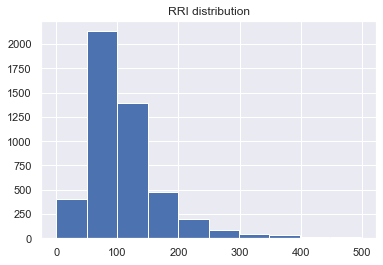

In [11]:
sns.set()
ax = df.rri[df.rri < 500].hist()
ax.set_title('RRI distribution')
plt.show()

## Risk
### Preparation rate at aggregate level

In [24]:
res_stoch.check_preparedness()
df = res_stoch.df_merged

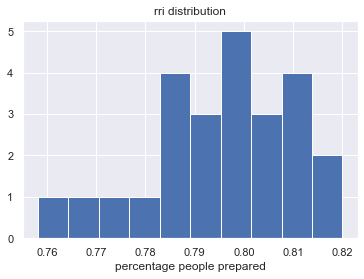

In [25]:
ax = df.groupby('sim')['prepared'].mean().hist()
ax.grid()
ax.set_title('rri distribution')
ax.set_xlabel('percentage people prepared')
ax.grid()
plt.show()

## Experiments

### Selling first residence

In [13]:
vars(res_deter.common)

{'nsim': 1,
 'non_stochastic': True,
 'base_year': 2022,
 'db_penalty_early_ret': 0.05,
 'rrsp_limit_2018': 26230.0,
 'rrsp_limit_2019': 26500.0,
 'rrsp_limit_2020': 27230.0,
 'rrsp_limit_2021': 27830.0,
 'rrsp_limit_2022': 29210.0,
 'rrsp_limit_2023': 30780.0,
 'rrsp_limit_2024': 31560.0,
 'tfsa_limit_2018': 5500.0,
 'tfsa_limit_2019': 6000.0,
 'tfsa_limit_2020': 6000.0,
 'tfsa_limit_2021': 6000.0,
 'tfsa_limit_2022': 6000.0,
 'tfsa_limit_2023': 6500.0,
 'gr_wages': 0.01,
 'gr_ympe': 0.03,
 'perc_cpp_2018': 0.25,
 'perc_cpp_2019': 0.262,
 'perc_cpp_2020': 0.274,
 'perc_cpp_2021': 0.29,
 'perc_cpp_2022': 0.31,
 'perc_cpp_2023': 0.33,
 'future_years': 110,
 'official_ret_age': 65,
 'min_age_cpp': 18,
 'max_ret_age': 75,
 'min_claim_age_cpp': 60,
 'max_claim_age_cpp': 70,
 'max_term_debts': 30,
 'age_cons_bef_ret': 55,
 'past_years': 50,
 'max_years_db': 35,
 'fee_rpp': 0.015,
 'max_age_no_rrif': 71,
 'frac_cap_gains': 0.5,
 'mix_bills_rpp': 0.0,
 'mix_bonds_rpp': 0.4,
 'mix_equity_rpp':

In [14]:
res_not_selling = main.run_simulations(inputs, 1, non_stochastic=True,
                                       sell_first_resid=False)
res_not_selling.summarize()
res_not_selling.check_preparedness()
df = res_not_selling.df_merged

print(f'\npercentage people prepared without selling house: {df.prepared.mean() * 100:.2f}%')

res_selling = main.run_simulations(inputs, 1, non_stochastic=True,
                                   sell_first_resid=True)
res_selling.summarize()
res_selling.check_preparedness()
df = res_selling.df_merged

print(f'\npercentage people prepared when selling house: {df.prepared.mean() * 100:.2f}%')

/Users/TessaLoRiggio/CEDIA Dropbox/Tessa LoRiggio/RSI/CPR_master/CPR/initialisation.py:166: RuntimeWarning: divide by zero encountered in log
  log_wages[:rel_ret_age] = (np.log(self.init_wage) + diffs)



Deterministic Model

Extra parameters:
sell_first_resid: False

percentage people prepared without selling house: 80.88%


/Users/TessaLoRiggio/CEDIA Dropbox/Tessa LoRiggio/RSI/CPR_master/CPR/initialisation.py:166: RuntimeWarning: divide by zero encountered in log
  log_wages[:rel_ret_age] = (np.log(self.init_wage) + diffs)



Deterministic Model

Extra parameters:
sell_first_resid: True

percentage people prepared when selling house: 79.22%


In [15]:
vars(res_deter.prices)

{'seed': 0,
 'inflation_rate': 0.02,
 'ret_equity_2018': -0.085,
 'mu_equity': 0.0545,
 'rho_equity': 0.0,
 'sig_equity': 0.1749,
 'ret_dividends': 0.043,
 'ret_bills_2018': -0.0205,
 'mu_bills': 0.0098,
 'rho_bills': 0.5564,
 'sig_bills': 0.0425,
 'ret_bonds_2018': 0.0101,
 'mu_bonds': 0.023,
 'rho_bonds': 0.3727,
 'sig_bonds': 0.079,
 'ret_housing_2018': 0.0004,
 'mu_housing': 0.0161,
 'rho_housing': 0.21,
 'sig_housing': 0.0987,
 'price_rent_2018': 20.0,
 'mu_price_rent': 15.0,
 'rho_price_rent': 0.95,
 'sig_price_rent': 4.0,
 'corr_housing_price_rent': 0.6,
 'ret_business_2018': -0.085,
 'mu_business': 0.0545,
 'rho_business': 0.0,
 'sig_business': 0.1749,
 'gr_rate_wage': 0.01,
 'rho_wage': 0.96235919,
 'sig_pers_wage': 0.050739054,
 'sig_trans_wage': 0.018554826,
 'adj_fact_annuities': 0.9,
 'ret_dividends_tsx': 0.028,
 'ret_bills': array([[-0.00091   ],
        [ 0.01290498],
        [ 0.02067417],
        [ 0.02502273],
        [ 0.02745028],
        [ 0.02880346],
        [ 0.

In [16]:
mu_equity_bm = res_deter.prices.mu_equity
mu_bills_bm = res_deter.prices.mu_bills
mu_bonds_bm = res_deter.prices.mu_bonds

factors = np.linspace(0, 2, 10)

l_prepared = []
for factor in factors:
    res = main.run_simulations(inputs, 1, non_stochastic=True,
                               mu_equity=factor * mu_equity_bm,
                               mu_bills=factor * mu_bills_bm,
                               mu_bonds=factor * mu_bonds_bm)
    res.check_preparedness()
    l_prepared.append(res.df_merged.prepared.mean())    

/Users/TessaLoRiggio/CEDIA Dropbox/Tessa LoRiggio/RSI/CPR_master/CPR/initialisation.py:166: RuntimeWarning: divide by zero encountered in log
  log_wages[:rel_ret_age] = (np.log(self.init_wage) + diffs)
/Users/TessaLoRiggio/CEDIA Dropbox/Tessa LoRiggio/RSI/CPR_master/CPR/initialisation.py:166: RuntimeWarning: divide by zero encountered in log
  log_wages[:rel_ret_age] = (np.log(self.init_wage) + diffs)
/Users/TessaLoRiggio/CEDIA Dropbox/Tessa LoRiggio/RSI/CPR_master/CPR/initialisation.py:166: RuntimeWarning: divide by zero encountered in log
  log_wages[:rel_ret_age] = (np.log(self.init_wage) + diffs)
/Users/TessaLoRiggio/CEDIA Dropbox/Tessa LoRiggio/RSI/CPR_master/CPR/initialisation.py:166: RuntimeWarning: divide by zero encountered in log
  log_wages[:rel_ret_age] = (np.log(self.init_wage) + diffs)
/Users/TessaLoRiggio/CEDIA Dropbox/Tessa LoRiggio/RSI/CPR_master/CPR/initialisation.py:166: RuntimeWarning: divide by zero encountered in log
  log_wages[:rel_ret_age] = (np.log(self.init_

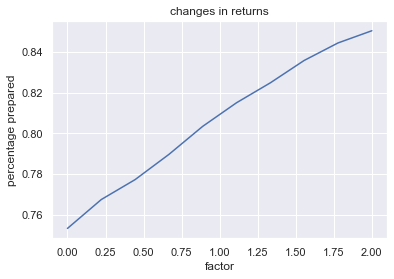

In [17]:
plt.plot(factors, l_prepared)
plt.title('changes in returns')
plt.xlabel('factor')
plt.ylabel('percentage prepared')
plt.show()

# Using CPR with other inputs

More info on the variables here: http://ire.hec.ca/en/wp-content/uploads/sites/3/2020/06/cpr-report-2020-final.pdf

In [18]:
inputs.head()

,byear,sex,ret_age,education,init_wage,pension,bal_rrsp,bal_tfsa,bal_other_reg,bal_unreg,cont_rate_rrsp,cont_rate_tfsa,cont_rate_other_reg,cont_rate_unreg,withdrawal_rrsp,withdrawal_tfsa,withdrawal_other_reg,withdrawal_unreg,replacement_rate_db,rate_employee_db,income_previous_db,init_dc,rate_employee_dc,rate_employer_dc,s_byear,s_sex,s_ret_age,s_education,s_init_wage,s_pension,s_bal_rrsp,s_bal_tfsa,s_bal_other_reg,s_bal_unreg,s_cont_rate_rrsp,s_cont_rate_tfsa,s_cont_rate_other_reg,s_cont_rate_unreg,s_withdrawal_rrsp,s_withdrawal_tfsa,s_withdrawal_other_reg,s_withdrawal_unreg,s_replacement_rate_db,s_rate_employee_db,s_income_previous_db,s_init_dc,s_rate_employee_dc,s_rate_employer_dc,weight,couple,prov,first_residence,second_residence,price_first_residence,price_second_residence,business,price_business,mix_bonds,mix_bills,mix_equity,fee,fee_equity,credit_card,personal_loan,student_loan,car_loan,credit_line,first_mortgage,second_mortgage,other_debt,credit_card_payment,personal_loan_payment,student_loan_payment,car_loan_payment,credit_line_payment,first_mortgage_payment,second_mortgage_payment,other_debt_payment,claim_age_cpp,s_claim_age_cpp,cap_gains_unreg,s_cap_gains_unreg,realized_losses_unreg,s_realized_losses_unreg,init_room_rrsp,init_room_tfsa,s_init_room_rrsp,s_init_room_tfsa
0,1974.0,male,55.0,post-secondary,85000.0,NaN,39473.685622,8000.000000,NaN,1000.000000,0.039474,0.083333,NaN,0.055556,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1968.0,female,65.0,university,45000.0,NaN,41379.308701,1000.000000,NaN,300000.0,0.027586,0.017857,NaN,0.00,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1,True,on,NaN,NaN,NaN,NaN,0.0,0.0,0.000000,1.000000,0.000000,0.010000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.0,65.0,0,0.0,0,0.0,0,0,0.0,0.0
1,1968.0,male,67.0,university,40000.0,NaN,160000.000000,11242.105007,NaN,NaN,0.000000,0.000000,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1974.0,female,67.0,high school,45000.0,NaN,50.000000,205.371898,NaN,37000.0,0.000000,0.000000,NaN,0.25,0.0,0.0,NaN,0.0,NaN,NaN,NaN,200.0,0.04,0.04,1,True,on,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.010000,0.000000,8000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,250.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.0,60.0,0,0.0,0,0.0,0,0,0.0,0.0
2,1995.0,male,65.0,university,34320.0,NaN,NaN,7000.000000,NaN,NaN,NaN,0.024793,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,20000.0,0.03,0.03,1985.0,female,60.0,high school,120000.0,NaN,29411.765933,NaN,NaN,NaN,0.039216,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.54,0.03,NaN,NaN,NaN,NaN,1,True,on,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,99.0,NaN,14000.0,200.0,NaN,NaN,NaN,NaN,89.0,NaN,80.0,500.0,NaN,NaN,NaN,NaN,70.0,65.0,0,0.0,0,0.0,0,0,0.0,0.0
3,1986.0,male,65.0,university,30000.0,NaN,NaN,11000.000000,NaN,80000.000000,NaN,0.000000,NaN,0.000000,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,False,qc,350000.0,NaN,350000.0,NaN,NaN,NaN,0.141176,0.647059,0.211765,0.008235,0.003176,NaN,NaN,NaN,NaN,40000.0,210000.0,NaN,NaN,NaN,NaN,NaN,NaN,1600.0,1200.0,NaN,NaN,70.0,NaN,0,NaN,0,NaN,0,0,NaN,NaN
4,1991.0,male,75.0,high school,45000.0,NaN,110000.000000,NaN,NaN,81818.184257,0.000000,NaN,NaN,0.000000,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1969.0,female,70.0,university,48000.0,1500.0,8400.000036,0.000000,NaN,70.0,0.064000,0.000000,NaN,0.00,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1,True,on,600000.0,NaN,600000.0,NaN,0.0,0.0,0.549214,0.009261,0.441525,0.018023,0.007161,NaN,NaN,NaN,45000.0,NaN,240000.0,NaN,NaN,NaN,NaN,NaN,800.0,NaN,1200.0,NaN,NaN,65.0,65.0,0,0.0,0,0.0,0,0,0.0,0.0


In [19]:
# saving copy of dataframe
inputs.iloc[0, :].to_frame().T.to_csv('my_inputs.csv', index=False)

In [20]:
my_inputs = pd.read_csv('my_inputs.csv')

In [21]:
my_res = main.run_simulations(my_inputs, 100, non_stochastic=False)
my_res.check_preparedness()
df = my_res.df_merged

df.prepared.value_counts(normalize=True)

False    0.76
True     0.24
Name: prepared, dtype: float64

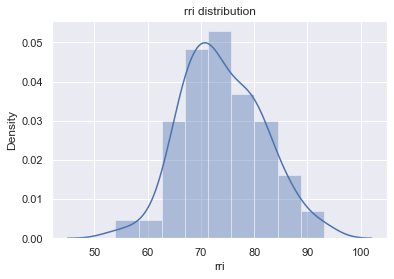

In [22]:
ax = sns.distplot(df.loc[df.rri<500, 'rri'])
ax.grid()
ax.set_title('rri distribution')
ax.grid()
plt.show()